<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

In [ ]:
# **Important Considerations regarding hold out method:**
# - **High variance** - the estimates depend on which samples end up in which set. This implies that, if data is not *i.i.d.* (something we tend to assume), different random splits can give quite different performance estimates.
# - If our data is large and both sets have similar distributions, this approach is acceptable.
# - **Stratification** of the target variable ensures that class proportions are maintained in both resulting sets (reduces variance): **Exclusive to classification problems**

# SÓ POSSO DIZER QUE UM MODELO É MELHOR QUE OUTRO CONSIDERANDO ESSE VALIDATION SET QUANDO USO HOLD-OUT <BR>
#<div class="alert alert-block alert-success">
#PARA DIZER QUE UM MODELO É MELHOR QUE OUTRO É PRECISO USAR MÉDIA DOS RESULTADOS + TESTES ESTATÍSTICOS
#One of the main reasons to use cross-validation is to compare different models fairly on the same data with the same validation strategy. This helps you pick the best algorithm for your specific problem.


In [ ]:
#Aplicar o Interactive Imputer do Tomás MICE – Multiple Imputation by Chained Equations.

In [ ]:
# KNN Imputer
# **1. Distance Calculation:**
# - For a sample with missing values, KNNImputer calculates the distance to ALL other samples
# - **Important**: Only uses features that are **present in both samples** (non-missing)
# - This means different pairs of samples might use different sets of features for distance calculation

# **2. Finding Neighbors:**
# - Select the K samples with the smallest distances
# - These are the "nearest neighbors" based on the available (non-missing) features

# **3. Imputation:**
# - For each missing feature, take the **mean** of that feature's values from the K nearest neighbors
# - If `weights='uniform'`: Simple arithmetic mean
# - If `weights='distance'`: Weighted mean where closer neighbors contribute more

#Foca numa variável, descarta todas as observações que têm essa variável a missing e vai ver os vizinhos + próximos para imputar o valor
#TRATA TODAS AS LINHAS COM NAN COMO TARGET, ELIMINA AS LINHAS COM NAN EM FEATURES, A PREVISÃO É A AVERAGE DO NEIGHBORS

# **MAIN PARAMETERS**:
# - `n_neighbors`: Number of neighbors to use (default=5)
# - `weights`: `'uniform'` or `'distance'` (default='uniform')
# - `metric`: Distance metric to use (default='nan_euclidean')
# #            `'nan_euclidean'`: Special Euclidean that ignores NaN values in distance calculation
# - `algorithm` ({'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'): Algorithm used to compute nearest neighbors
# - `metric` (str or callable, default='minkowski'): Distance metric to use for the tree
# - `p` (int, default=2): Power parameter for the Minkowski metric. p=1 is Manhattan distance, p=2 is Euclidean distance
# -> `add_indicator`: Whether to add binary indicators for which values were missing

# **Main Attributes (after fitting):**  
# - `indicator_`: Indicator used to add binary indicators for imputed values
# - `n_features_in_`: Number of features seen during fit

# **Main Methods:**  
# - `fit(X, y=None)`: Fit the imputer on X
# - `transform(X)`: Impute all missing values in X
# - `fit_transform(X, y=None)`: Fit to data, then transform it
# - `get_feature_names_out()`: Get output feature names for transformation

# This approach is more sophisticated than simple mean/median imputation because it considers the **similarity structure** of your data!

# - **Rule of thumb**: Start with K=5 (sklearn's default) and experiment

# **When to use KNN Imputer:**
# - When missing values are related to other features (MAR - Missing At Random)  
# - When you want to preserve feature relationships  
# - For moderate-sized datasets (can be slow on large data)  
# - When missingness is not too extreme (<20-30% missing)

#  **Outliers** can significantly affect predictions (mean is sensitive to outliers)

#ISTO DA FOTO NÃO ME PARECE VERDADE, VER MELHOR

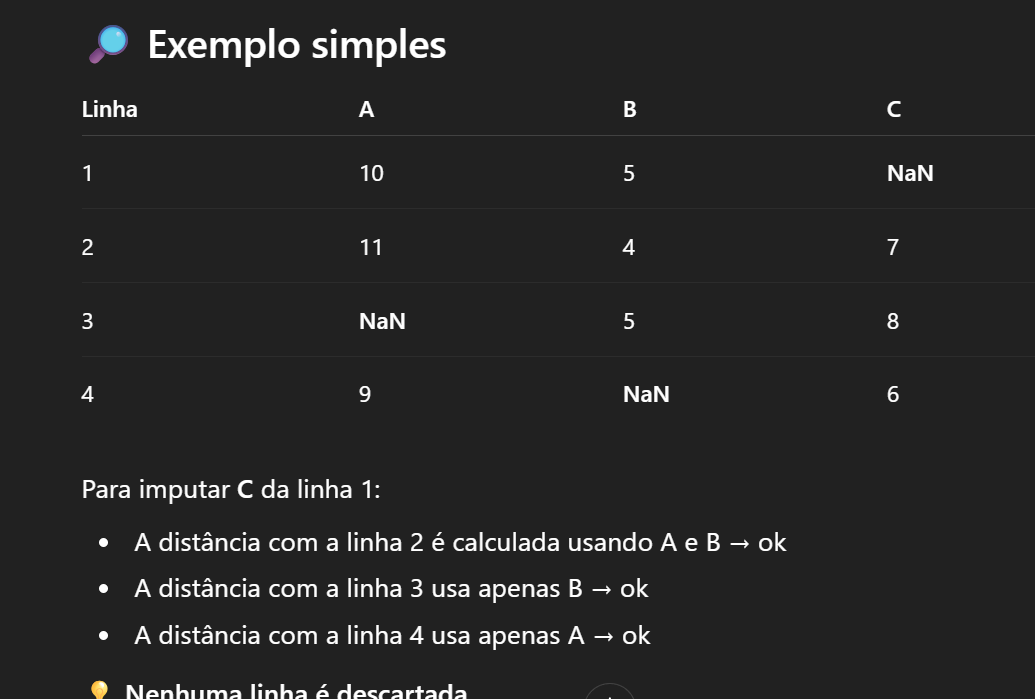
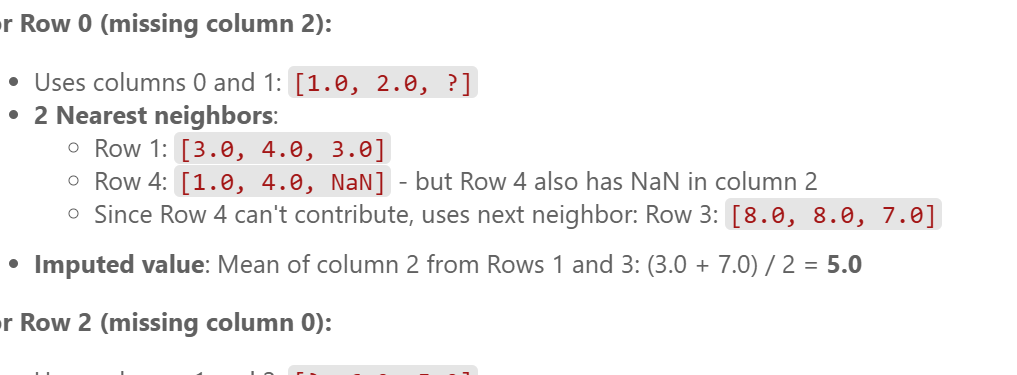

In [ ]:
**Cramer's V** **Point Bi-serial correlation** or **PhiK** categorical target
X_train_num_scaled

Modelos não-lineares (árvores, XGBoost, Random Forest)

Aqui, sim:
➡️ Duas variáveis redundantes podem ajudar — e até melhorar o modelo.

usar ANOVA


WRAPPER METHODS
# - **Exhaustive Feature Selection**: tries all possible combinations of features and selects the one that results in the best model performance.
# - **Forward Selection**: starts with no features and adds one feature at a time, selecting the feature that improves the model performance the most at each step.
# - **Backward Elimination**: starts with all features and removes one feature at a time, removing the feature that decreases the model performance the least at each step.
# - **Stepwise Selection**: a combination of forward selection and backward elimination, where features can be added or removed at each step based on their impact on model performance.
# - **Recursive Feature Elimination (RFE)**: BASE ESTIMATOR (EX:LR, SVM?) TEM DE TER FEATURE IMPORTANCE A special case of **Backward Selection** that starts with all features and recursively removes the least important feature based on the feature importance provided by the base estimator.

Não queremos ser nós a decidir o nr de features a escolher, deixamos o modelo decidir por nós

ranking_, support_

EMBEDDING METHODS
# - **Tree-based methods**: These methods use decision trees to calculate feature importance based on how much each feature contributes to reducing the impurity of the tree. Examples include Random Forest and Gradient Boosting.
# - **Regularization methods**


1.SERÁ QUE PODEMOS FAZER O TESTE ESTATÍSTICO DE RELEVÂNCIA DOS COEFICIENTES DOS MODELOS LINEARES (p-valor) A CADA FEATURE SEPARADAMENTE? QUE TIPO DE METODO SERIA? 
PARA USAR ISTO NÃO PODEMOS USAR SCIKIT-LEARN MODEL, TENHO DE VOLTAR A FAZER O MODELO MAS PELO MENOS OLS É DETERMINÍSTICO O MODELO QUE VAI DAR É EXATAMENTE O MESMO E COMPLETAMENTE VÁLIDAS AS CONCLUSÕES
SE O VALOR-P É SUPERIOR A 0.05 NÃO É SIGNIFICATIVO-> FAZER COMO FEATURE IMPORTANCE
PODE ACONTECER MUITO **$R^2 train = 0$**, which means that the model is no better than just predicting the mean of the target variable. This is a common problem with linear regression when the data is not linearly related to the target variable. LEMBRA-TE QUE ISTO TUDO É EM RELAÇÃO AO TRAIN
2. CRIAR UMA RULE OF THUMBS QUE SERIA RETIRAR TODOS COM COEF. INFERIOR A QUALQUER COISA coef_


SyntaxError: unterminated string literal (detected at line 1) (1123726879.py, line 1)

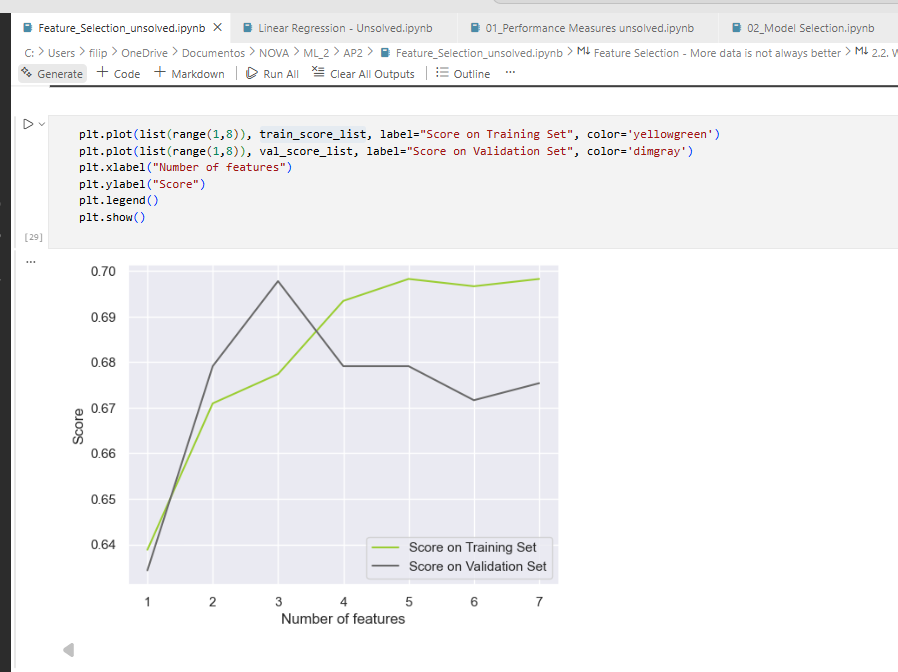

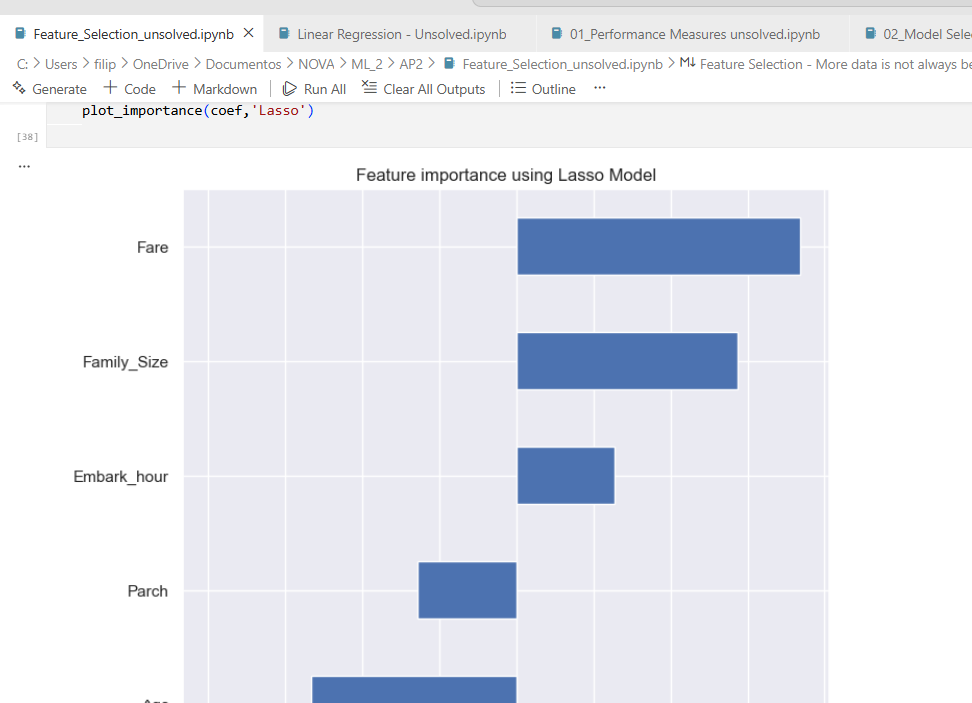

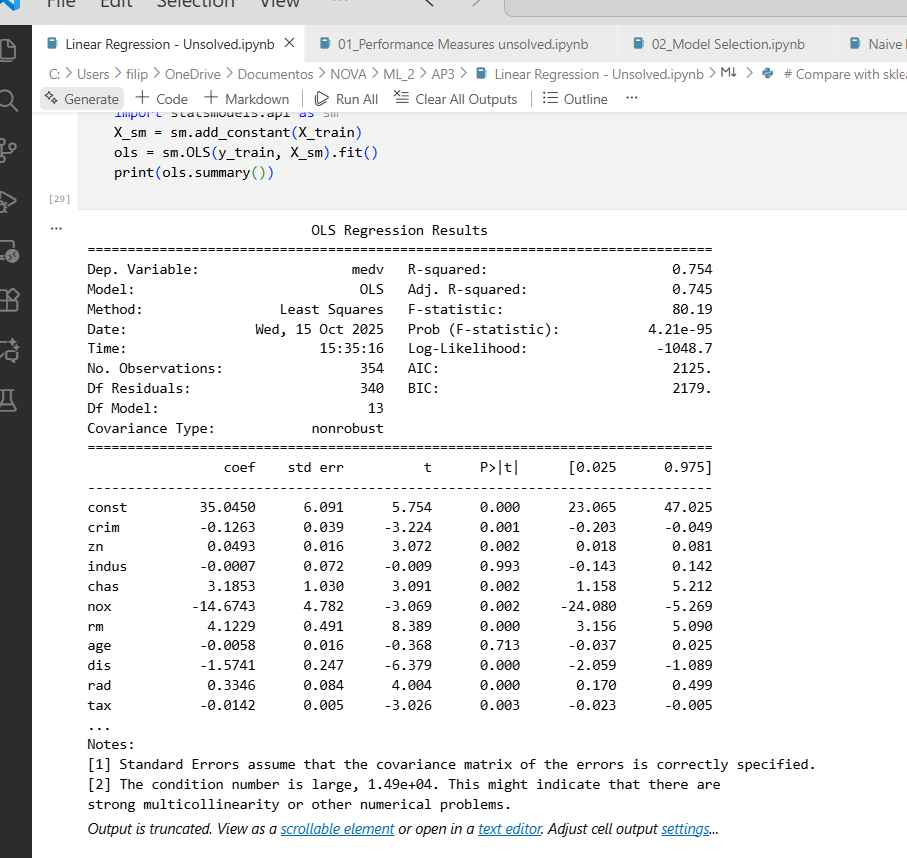

In [ ]:
# LR é sensitivity to outliers and multicollinearity among predictors; 
# as penalidades (penalizar coef. grandes: **L2 for multicollinearity**) previnem overfit. 
# Quanto maior alpha, mais regularization.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# #-------------------------------------------------------------------------------------------------------------------------
# RIDGE:
# __Key Parameters:
# - `alpha`: Regularization strength; must be a positive float. Larger values specify stronger regularization (default=1.0)
# - `fit_intercept`: default=True
# - `solver`: Solver to use in the computational routines (default='auto').
# __Methods:`.fit(X, y)`, `.predict(X)`
# __Attributes:`.coef_`, `.intercept_`

# #--------------------------------------------------------------------------------------------------------------------------
# LASSO:
# __Key Parameters:
# - `alpha`: Constant that multiplies the L1 term, controlling regularization strength (default=1.0).
# - `fit_intercept`: default=True
# - `max_iter`: Maximum number of iterations for the optimization algorithm (default=1000).
# - `selection`: Method for updating coefficients - 'cyclic' or 'random' (default='cyclic'). 
# __Methods: `.fit(X, y)`, `.predict(X)`

# __Attributes: `.coef_`, `.intercept_`
# - `.n_iter_`: Number of iterations run by the coordinate descent solver.



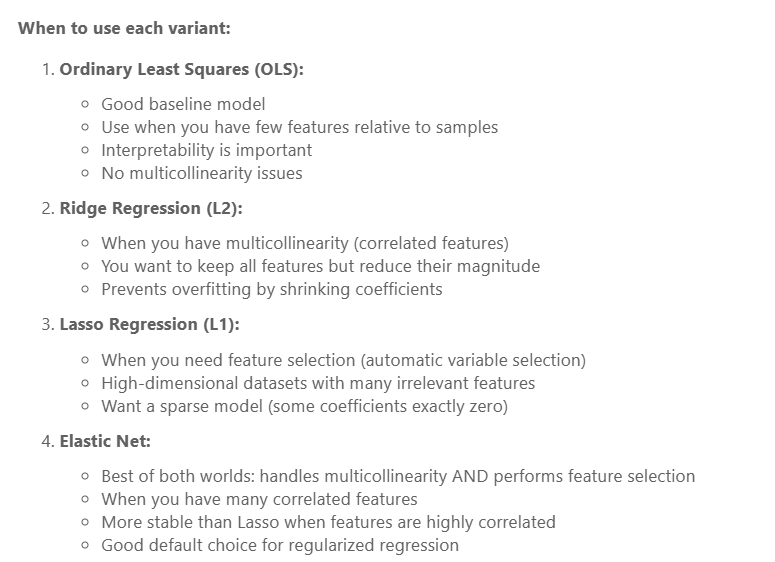

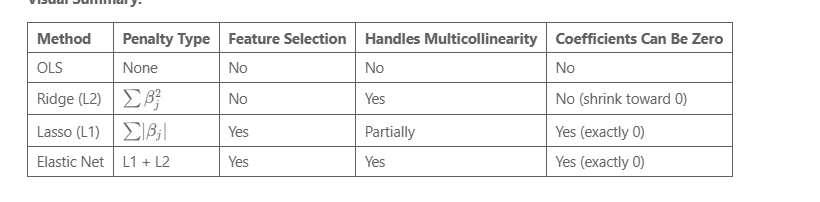
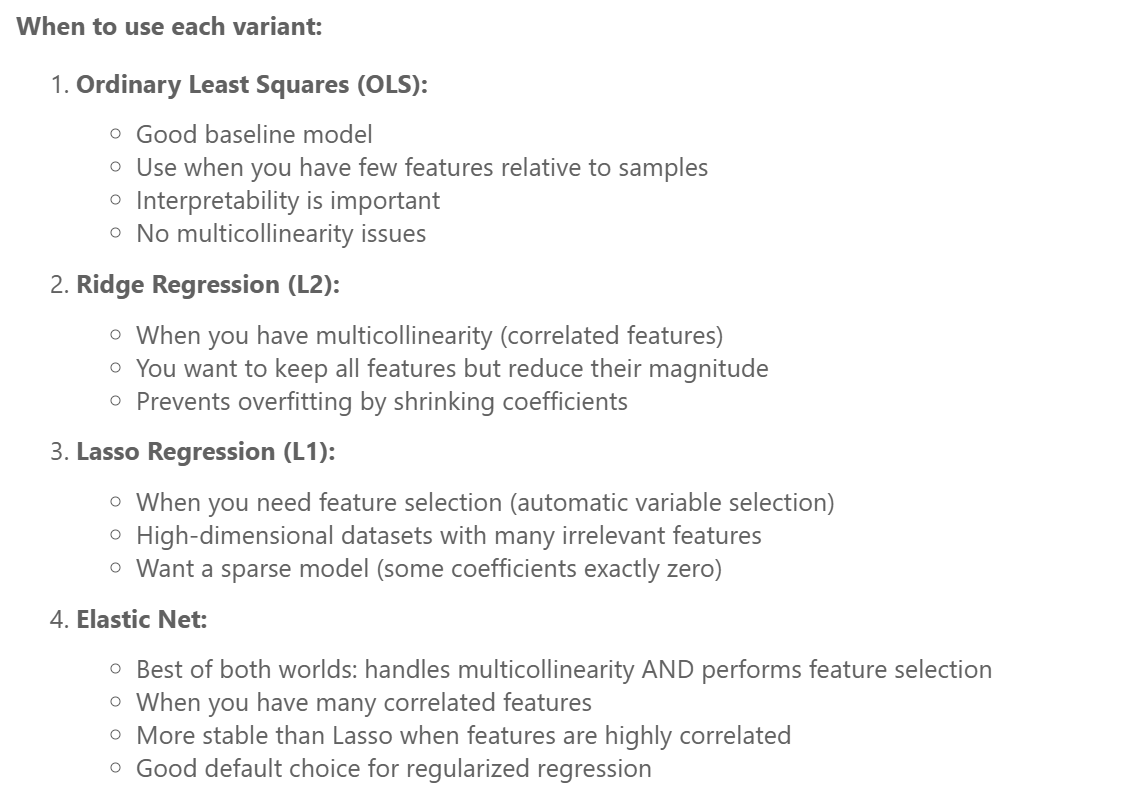

In [ ]:
#KNN
# Using KNN with high-dimensional data (curse of dimensionality)!!!!!!!!!!!!!!!!
# Fazer knn pode ser muito custoso porque tem de calcular a distância de cada ponto novo a todos os pontos do dataset de treino, usar **KD-TREES E BALL-TREES KD-BALL**
# PODEMOS CRIAR PESOS DIFERENTES PARA CADA VIZINHO, POR EXEMPLO SER INVERSAMENTE PROPORCIONAL À DISTÂNCIA MAS ISTO TENDE A OVERFIT POR ISSO COSTUMA SER USADO PARA COM K MAIOR DO QUE AQUELE QUE USARÍAMOS

# - Primary Hyperparameters:
# - **K**: The number of nearest neighbors to consider (hyperparameter). baixo K overfitting, alto K underfitting PORQUE A DECISION BOUNDARY VAI SER IGUAL A TODA A ÁREA
# - **Distance Metric**: How we measure "closeness" (Euclidean, Manhattan, etc.)
#  -- **Euclidean**
#  -- **Manhattan**: MAHATAN DISTANCE COSTUMA SER MELHOR COM GRANDES DIM PORQUE NÃO COMPUTA TANTO A RAIZ QUADRADA https://bib.dbvis.de/uploadedFiles/155.pdf
#  -- **Minkowski**: 
#  -- **Chebyshev**: 
#  -- **Cosine**
# - **Weighting**: Whether all neighbors contribute equally or closer ones have more influence
#  -- **Uniform weighting** (`'uniform'`): All neighbors contribute equally to the prediction
#  -- **Distance weighting** (`'distance'`): Closer neighbors have more influence than distant ones. 
#                         Weight is inversely proportional to distance: $w = 1/d$
#                         Prevents far neighbors from having too much influence
#                         Can help reduce the impact of choosing an "incorrect" K value

# **When to use distance weighting?**
# - When you believe closer neighbors are more relevant
# - To reduce sensitivity to K selection
# - In high-dimensional spaces where distances can be less meaningful
# - **Algorithm**: How we efficiently find neighbors (Brute Force, KD-Tree, Ball Tree)
#  -- **Brute Force** (`'brute'`): Computes distance to all training points - simple but slow for large datasets
#  -- **KD-Tree** (`'kd_tree'`): Builds a tree structure for faster neighbor search - works well for low-dimensional data
#  -- **Ball Tree** (`'ball_tree'`): Another tree-based method - better for high-dimensional data
#  -- **Auto** (`'auto'`): Automatically chooses the best algorithm based on the training data

predict_proba
#PARA CADA LINHA DÁ A PROB. (NA VERDADE A PROPORÇÃO) DE PERTENCER A CADA CLASSE
#NA 1A ROW VEMOS QUE TEM 100% DE PROB. DE SER DA CLASSE 2 PORQUE TODOS OS VIZINHOS SÃO DA CLASSE 2 (TEM CONFIANÇA 100%, SE K MUDASSE PODIA OU NÃO MUDAR)
#PARA AS PREVISÕES QUE SÃO PARVAS PODEMOS VER ESTA PROBABILIDADE

score(X_val, y_val))

modelKNN.kneighbors(X = X_val)
#1º ARRAY
#NA PRIMEIRA LINHA VEMOS A DISTÂNCIA DOS VIZINHOS MAIS PRÓXIMOS DA 1A LINHA DE X_VAL
#PODE AJUDAR VER SE ONDE AS DISTÂNCIAS SÃO MUITO PEQUENAS O MODELO ESTÁ A TER DIFICULDADES A PREVER PORQUE SE SÃO MUITOS PRÓXIMOS ENTRE SI DEVIAM TER PREÇOS SEMELHANTES

#2º ARRAY
#NA PRIMEIRA LINHA VEMOS QUAIS FORAM AS OBSERVAÇÕES MAIS PRÓXIMAS DA 1A LINHA DE X_VAL E FAZER ILOC PARA VER O QUE LÁ ESTÁ


escolher o melhor k:
numberK_list=np.arange(1,21)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

# **line plot** where you check the error of training and validation 
# according to the number of neighbors, using the values obtained in the last step.
#----------------------------------------------------------------------------------------------
#RADIUS NEIGHBORS
# Instead of finding K nearest neighbors, find all neighbors within a fixed radius

# - More adaptive to varying data density
# - Can handle sparse regions better  
# - May have no neighbors if radius is too small (outlier detection)
# - May have too many neighbors if radius is too large (slow predictions)
# - Requires careful tuning of the radius parameter

#+1 MODELO PARA ADICIONAR À NOSSA LISTA: RadiusNeighborsRegressor
# **Main Parameters:**
# - `radius` (float, default=1.0): Range of parameter space to use for finding neighbors
# - `weights` ({'uniform', 'distance'} or callable, default='uniform'): Weight function for prediction
# - `algorithm` ({'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'): Algorithm for computing neighbors
# - `outlier_label` ({manual label, 'most_frequent'}, default=None): Label for outliers (samples with no neighbors within radius)
# - `metric` (str or callable, default='minkowski'): Distance metric to use

# **Main Attributes:**
# - `classes_`: Class labels known to the classifier
# - `effective_metric_`: The distance metric used
# - `outlier_label_`: Label assigned to outlier samples

# **Main Methods:**
# - `fit(X, y)`: Fit the radius neighbors classifier from the training dataset
# - `predict(X)`: Predict class labels (majority vote of neighbors within radius)
# - `predict_proba(X)`: Return probability estimates based on neighbors within radius
# - `radius_neighbors(X, radius, return_distance)`: Find all neighbors within a given radius


#----------------------------------------------------------------------------------------------
# LOF Local Outlier Factor 
# Use neighbor density to detect anomalies/outliers in your data


# **Main Parameters:**
# - `n_neighbors` (int, default=20): Number of neighbors to use for density estimation
# - `contamination` (float or 'auto', default='auto'): Expected proportion of outliers in the dataset
# - `novelty` (bool, default=False): If True, can be used for novelty detection (predicting on new data). If False, only for outlier detection on training data
# - `metric` (str or callable, default='minkowski'): Metric to use for distance computation
# - `p` (int, default=2): Parameter for the Minkowski metric (p=2 is Euclidean distance)

# **Main Attributes:**
# - `negative_outlier_factor_`: The opposite of LOF of training samples. Lower values = more abnormal. Values < -1.5 typically indicate outliers
# - `n_neighbors_`: Actual number of neighbors used
# - `offset_`: Offset used to obtain binary labels from raw scores

# **Main Methods:**
# - `fit(X)`: Fit the LOF model (no y needed - unsupervised)
# - `fit_predict(X)`: Fit model and return labels (1 for inliers, -1 for outliers)
# - `score_samples(X)`: Opposite of LOF for each sample (lower = more abnormal)
# - `predict(X)`: Predict labels for new data (only if novelty=True)

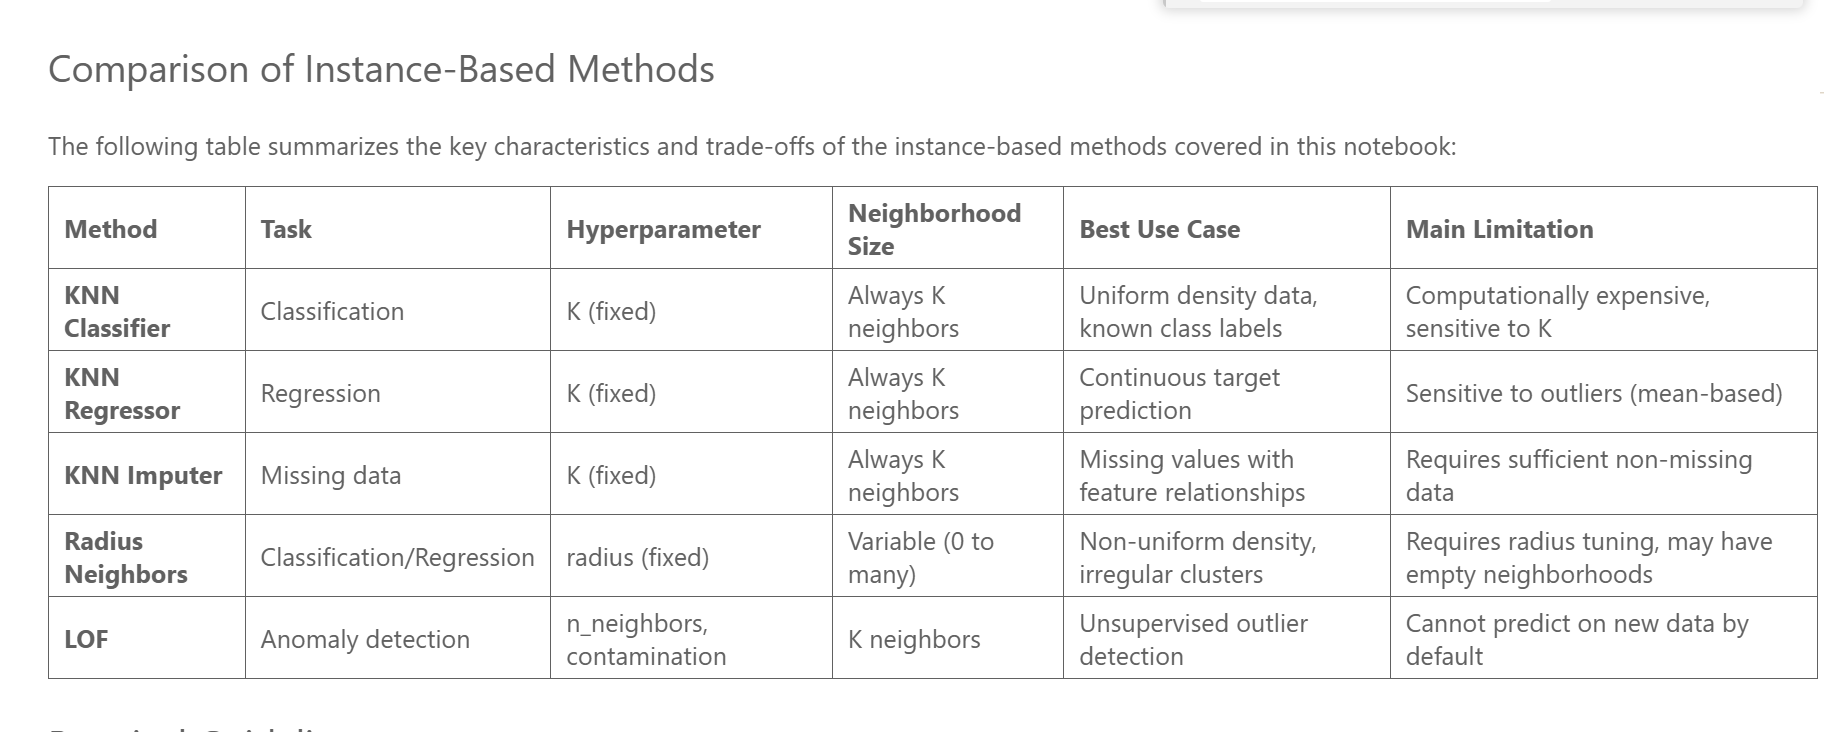

In [ ]:
# PROBLEMAS DO **MAE**:
# - OUTLIERS AFETAM MUITO O MAE
# - DEPOIS NÃO DESTINGUE ENTRE PODER HAVER (9 ERROS DE ZERO E 1 ERRO DE 10) E (10 ERROS DE 1) O QUE TER UM ERRO DE 10 PODE SER ALGO TERRÍVEL E O MODELO DIZ SER EQUIVALENTE


# PODEMOS TAMBÉM USAR **MAPE** (Mean absolute percentage error)
# All the metrics we've seen so far (MAE, MSE, RMSE, MedAE) are **scale-dependent**, meaning their values depend on the units and scale of your target variable. 
# This makes it difficult to compare model performance across different datasets or when the target variable has very different ranges.

# No notrbook da aula temos mesmo as vantagens e desvantagens de cada e maiores descrições
#Importante explicar porquê que usamos certa métrica

In [ ]:
# HYPERPARAMETER TUNING WITH HOLD-OUT VALIDATION
# Perform grid search using holdout validation
# We'll loop through all parameter combinations:
# - We fit preprocessing (scaling, NaN filling) only on **X_train**
# - We evaluate each model on **X_val** (which wasn't used for training or to make preprocessing decisions)
# - The **test set is never touched** during hyperparameter selection
#ALGO DESTE GÉNERO:

# Manual grid search with holdout validation
best_score = 0
best_params = None
results = []

# Loop through all parameter combinations
for C in param_grid['C']:
    for penalty in param_grid['penalty']:
        for solver in param_grid['solver']:
            # Create model with current hyperparameters
            model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
            
            # Train model with preprocessing
            trained_model, fitted_scaler, fill_values = run_model(
                X_train, y_train,
                scaler=StandardScaler(),
                model=model,
                fill_method='median'
            )
            
            # Evaluate on validation set (using train's preprocessing)
            val_score = evaluate_model(X_val, y_val, trained_model, fitted_scaler, fill_values)
            
            # Store results
            results.append({
                'C': C,
                'penalty': penalty,
                'solver': solver,
                'val_score': val_score
            })
            
            # Track best parameters
            if val_score > best_score:
                best_score = val_score
                best_params = {'C': C, 'penalty': penalty, 'solver': solver}


print("Grid Search Results (Holdout)")
print("="*50)
print(f"Best parameters: {best_params}")
print(f"Best validation score: {best_score:.4f}")
print(f"\nTested {len(results)} combinations")


#O GRÁFICO DEPOIS NÃO SERIA ESTE MAS PODIA SER O IMPACTO DE CADA ATRIBUTO NO RESULTADO DO MODELO, OU SEJA 
# TINHAMOS VÁRIOS GRÁFICOS E TINHAMOS UMA LINHA PARA TRAIN E OUTRA PARA VAL SÓ PARA O MELHOR MODELO
# A LINHA SERIA A MÉDIA DA MÉTRICA TIPO MAPE PARA TODOS AS DIFERENTES CONFIGURAÇÕES QUE USAM AQUELE ATRIBUTO COM AQUELE VALOR DE X, DEPOIS TERÍAMOS OS DESVIOS PADRÕES COM UMA COR MAIS CLARA A SOMBREAR

#DEPOIS Train final model with best parameters and evaluate on test set
#If test score is close to validation score, assuming the data in validation and test is similar, our model should generalize well!

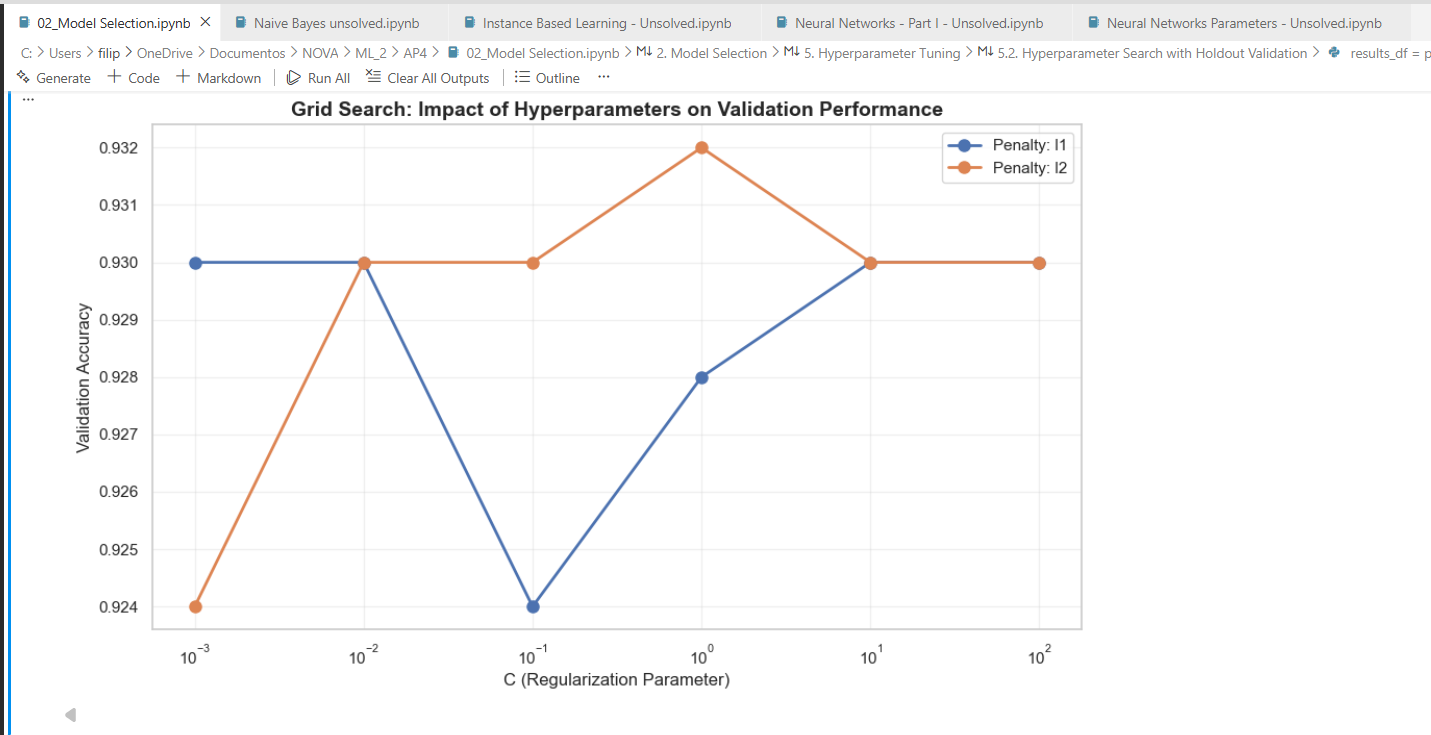
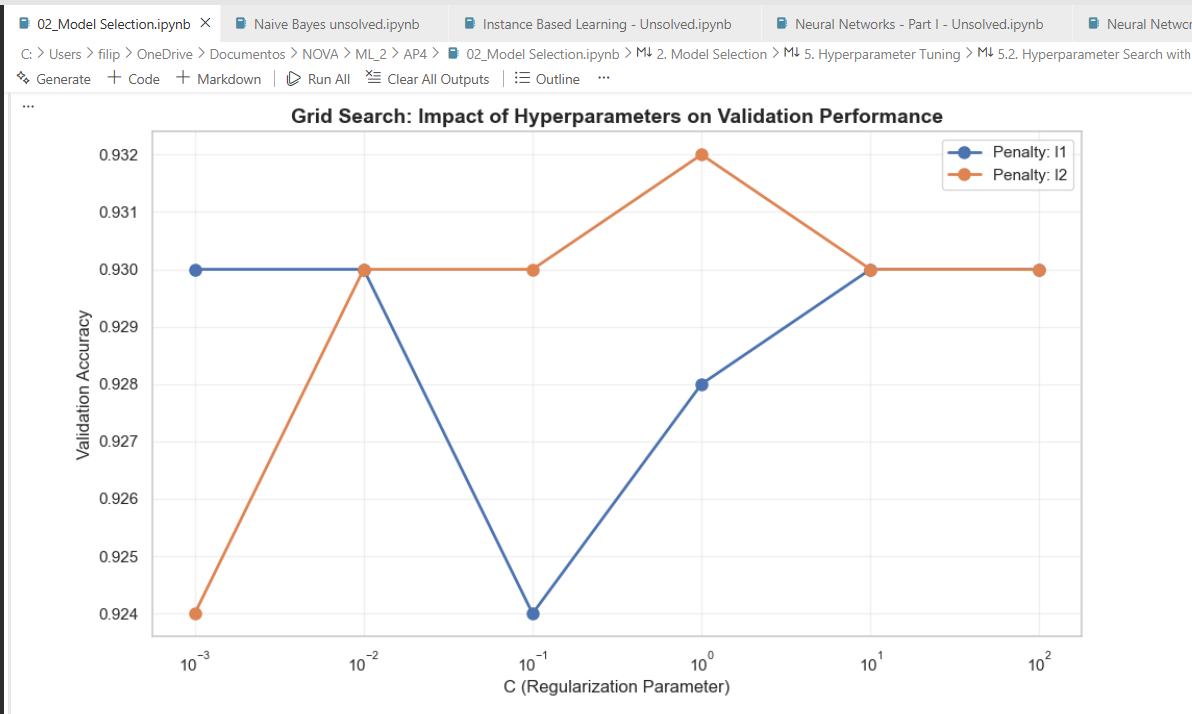

In [ ]:
LIMITAÇÃO dos modelos KNN, Decision Tree, Random Forest, Gradient Boosting, Ensemble: NÃO conseguem prever valores acima do máximo ou abaixo do mínimo do treino porque todos estes modelos fazem previsões usando apenas valores que já viram:

<div style="
  border: 2px solid #42A5F5;
  border-radius: 12px;
  background-color: #E3F2FD;
  padding: 14px;
  font-family: 'Segoe UI', sans-serif;
  color: #0D47A1;
  box-shadow: 2px 2px 8px rgba(33, 150, 243, 0.15);
">
  🚀 <b>O que é preciso:</b><br> 

 - Define and implement a clear and unambiguous strategy for **feature selection** (give the strategy and the results). Use the methods discussed in the course. Present and justify your final selection. <br>
ANOVA, MIC, Forward Selection, backward elimination, stepwise selection


APAGAR
</div>